#### <i> Analyzing the Economic Impact of Tourism in the USA Using Machine Learning Techniques Insights from Global Data </i>
#### <i> Dataset Link -- > https://www.kaggle.com/datasets/bushraqurban/tourism-and-economic-impact </i>
#### <i> Import Library Files </i>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



#### <i> Load The dataset </i>

In [4]:
df = pd.read_csv("world_tourism_economy_data.csv")
df

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,NaN,NaN,NaN,NaN,NaN,1.046822e+10,4.944324,NaN
6646,"Yemen, Rep.",YEM,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6647,South Africa,ZAF,2023,NaN,NaN,NaN,NaN,NaN,3.806993e+11,6.073909,32.098
6648,Zambia,ZMB,2023,NaN,NaN,NaN,NaN,NaN,2.757796e+10,10.884532,NaN


#### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      4289 non-null   float64
 4   tourism_arrivals      4949 non-null   float64
 5   tourism_exports       4114 non-null   float64
 6   tourism_departures    2589 non-null   float64
 7   tourism_expenditures  4173 non-null   float64
 8   gdp                   6424 non-null   float64
 9   inflation             5668 non-null   float64
 10  unemployment          3658 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


In [7]:
df.describe()

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
count,6650.000000,4.289000e+03,4.949000e+03,4114.000000,2.589000e+03,4173.000000,6.424000e+03,5668.000000,3658.000000
mean,2011.000000,3.062956e+10,6.263894e+07,15.506851,8.246093e+07,6.652740,2.089999e+12,6.319369,7.961191
std,7.211645,1.291076e+11,2.049444e+08,17.758374,2.064665e+08,4.071632,7.761985e+12,18.682769,5.802565
min,1999.000000,1.000000e+05,9.000000e+02,0.000956,2.000000e+03,0.157818,1.396473e+07,-16.859691,0.039000
25%,2005.000000,2.690000e+08,5.290000e+05,4.657732,1.051000e+06,4.074702,6.087182e+09,1.865425,4.250000
50%,2011.000000,1.553000e+09,2.508000e+06,8.306797,4.634000e+06,5.754790,3.681803e+10,3.629433,6.548000
75%,2017.000000,9.144227e+09,1.818000e+07,18.506710,4.508703e+07,7.985102,4.266977e+11,6.563197,9.894692
max,2023.000000,1.863069e+12,2.403074e+09,101.966999,2.034432e+09,28.192276,1.061717e+14,557.201817,57.000000


#### <i> Expolatory Data Analysis and Visulization </i>

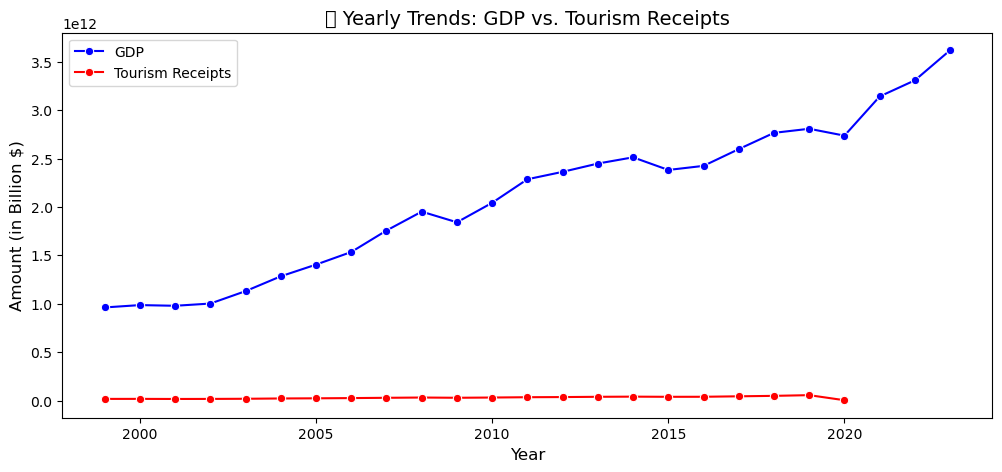

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 5))
df_grouped = df.groupby("year")[["gdp", "tourism_receipts"]].mean().reset_index()
sns.lineplot(x="year", y="gdp", data=df_grouped, label="GDP", marker="o", color="blue")
sns.lineplot(x="year", y="tourism_receipts", data=df_grouped, label="Tourism Receipts", marker="o", color="red")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount (in Billion $)", fontsize=12)
plt.title("📈 Yearly Trends: GDP vs. Tourism Receipts", fontsize=14)
plt.legend()
plt.show()

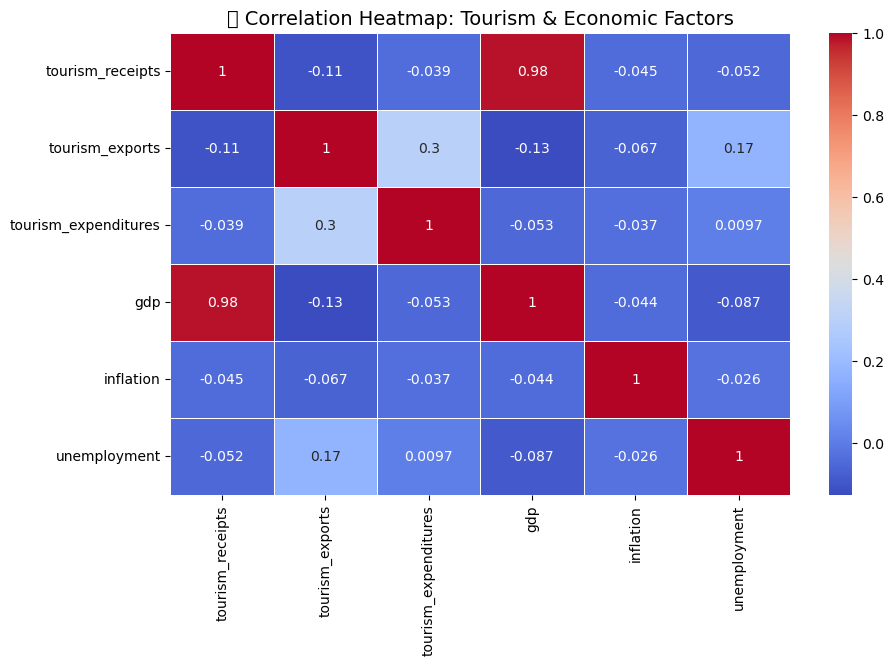

In [10]:
plt.figure(figsize=(10, 6))
correlation = df[["tourism_receipts", "tourism_exports", "tourism_expenditures", 
                  "gdp", "inflation", "unemployment"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("📊 Correlation Heatmap: Tourism & Economic Factors", fontsize=14)
plt.show()

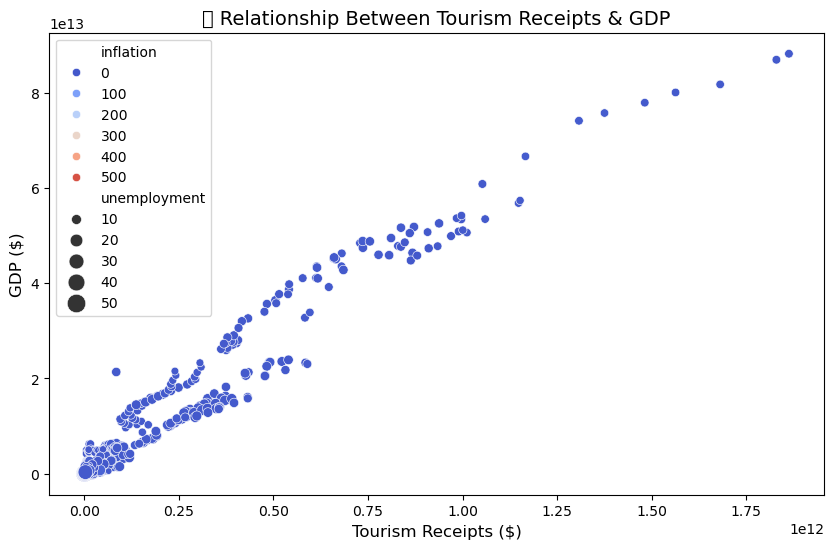

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["tourism_receipts"], y=df["gdp"], hue=df["inflation"], palette="coolwarm", size=df["unemployment"], sizes=(20, 200))
plt.xlabel("Tourism Receipts ($)", fontsize=12)
plt.ylabel("GDP ($)", fontsize=12)
plt.title("💰 Relationship Between Tourism Receipts & GDP", fontsize=14)
plt.legend()
plt.show()

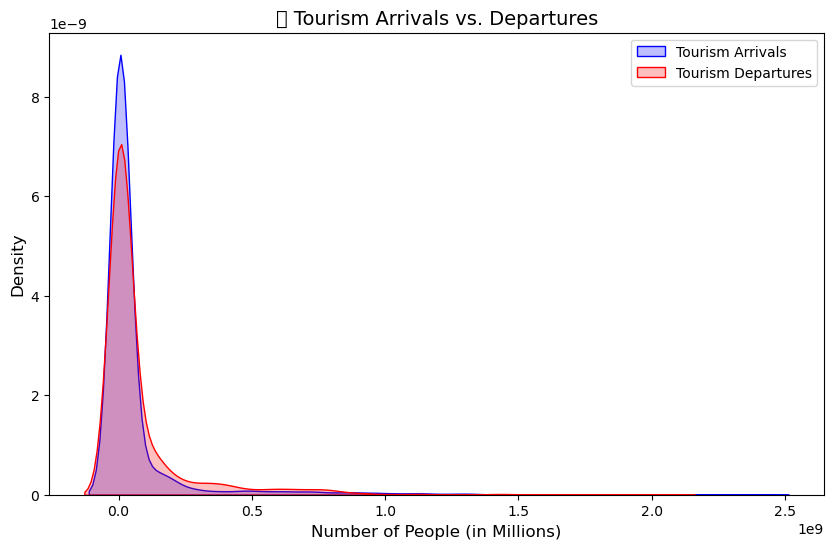

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df["tourism_arrivals"].dropna(), fill=True, color="blue", label="Tourism Arrivals")
sns.kdeplot(df["tourism_departures"].dropna(), fill=True, color="red", label="Tourism Departures")
plt.xlabel("Number of People (in Millions)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("🛬 Tourism Arrivals vs. Departures", fontsize=14)
plt.legend()
plt.show()

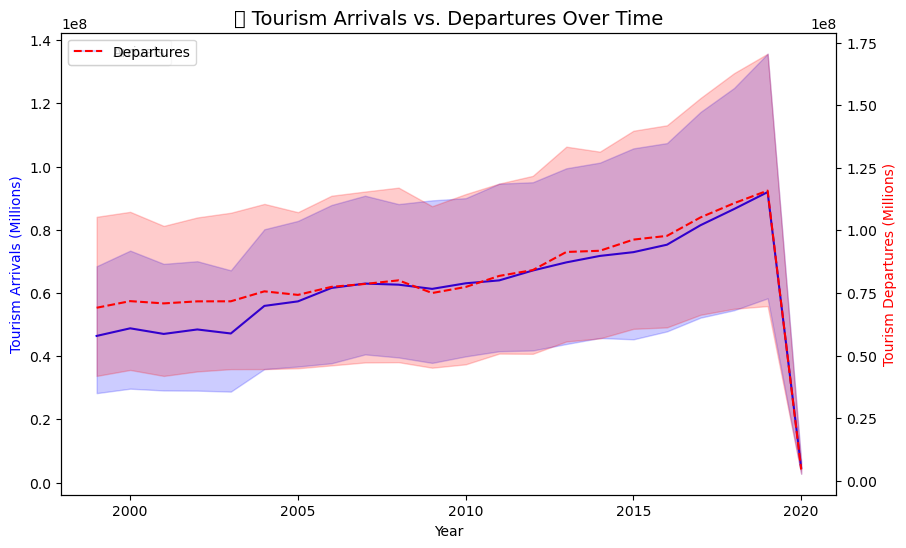

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
sns.lineplot(data=df, x="year", y="tourism_arrivals", ax=ax1, color="blue", label="Arrivals")
sns.lineplot(data=df, x="year", y="tourism_departures", ax=ax2, color="red", label="Departures", linestyle="dashed")
ax1.set_xlabel("Year")
ax1.set_ylabel("Tourism Arrivals (Millions)", color="blue")
ax2.set_ylabel("Tourism Departures (Millions)", color="red")
plt.title("📉 Tourism Arrivals vs. Departures Over Time", fontsize=14)
plt.show()

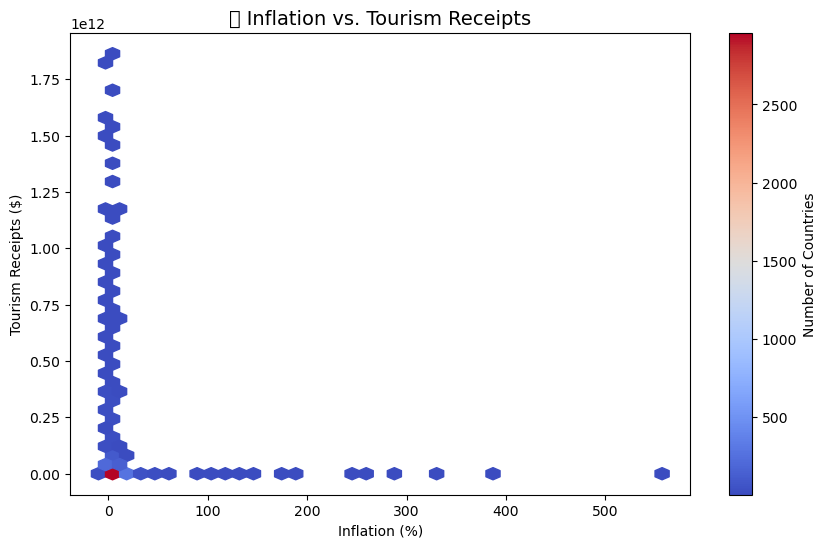

In [14]:
plt.figure(figsize=(10, 6))
plt.hexbin(df["inflation"], df["tourism_receipts"], gridsize=40, cmap="coolwarm", mincnt=1)
plt.colorbar(label="Number of Countries")
plt.xlabel("Inflation (%)")
plt.ylabel("Tourism Receipts ($)")
plt.title("📉 Inflation vs. Tourism Receipts", fontsize=14)
plt.show()


#### <i> Data Preprocessing </i>

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [17]:
# Handling missing values: Fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Encoding categorical variables
label_encoders = {}
for col in ["country", "country_code"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
df[["tourism_receipts", "tourism_arrivals", "tourism_exports", "tourism_departures",
    "tourism_expenditures", "gdp", "inflation", "unemployment"]] = scaler.fit_transform(
    df[["tourism_receipts", "tourism_arrivals", "tourism_exports", "tourism_departures",
        "tourism_expenditures", "gdp", "inflation", "unemployment"]])

In [18]:
median_tourism_receipts = df["tourism_receipts"].median()
df["tourism_impact"] = (df["tourism_receipts"] >= median_tourism_receipts).astype(int)

# Selecting features and target variable
X = df.drop(["tourism_receipts", "tourism_impact"], axis=1)
y = df["tourism_impact"]

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Evaluation
print("📌 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


📌 Logistic Regression Results:
Accuracy: 0.7218045112781954
ROC-AUC Score: 0.7799595890605879
Confusion Matrix:
 [[125 304]
 [ 66 835]]
              precision    recall  f1-score   support

           0       0.65      0.29      0.40       429
           1       0.73      0.93      0.82       901

    accuracy                           0.72      1330
   macro avg       0.69      0.61      0.61      1330
weighted avg       0.71      0.72      0.68      1330



#### <i> Random Forest Classifier </i>

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("📌 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


📌 Random Forest Results:
Accuracy: 0.9827067669172932
ROC-AUC Score: 0.9985072271420773
Confusion Matrix:
 [[418  11]
 [ 12 889]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       429
           1       0.99      0.99      0.99       901

    accuracy                           0.98      1330
   macro avg       0.98      0.98      0.98      1330
weighted avg       0.98      0.98      0.98      1330



#### <i> Gradient Boosting Classifier </i>

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("📌 Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


📌 Gradient Boosting Results:
Accuracy: 0.9473684210526315
ROC-AUC Score: 0.9901689135873375
Confusion Matrix:
 [[389  40]
 [ 30 871]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       429
           1       0.96      0.97      0.96       901

    accuracy                           0.95      1330
   macro avg       0.94      0.94      0.94      1330
weighted avg       0.95      0.95      0.95      1330



#### <i> Feature Importance Of Random Forest </i>

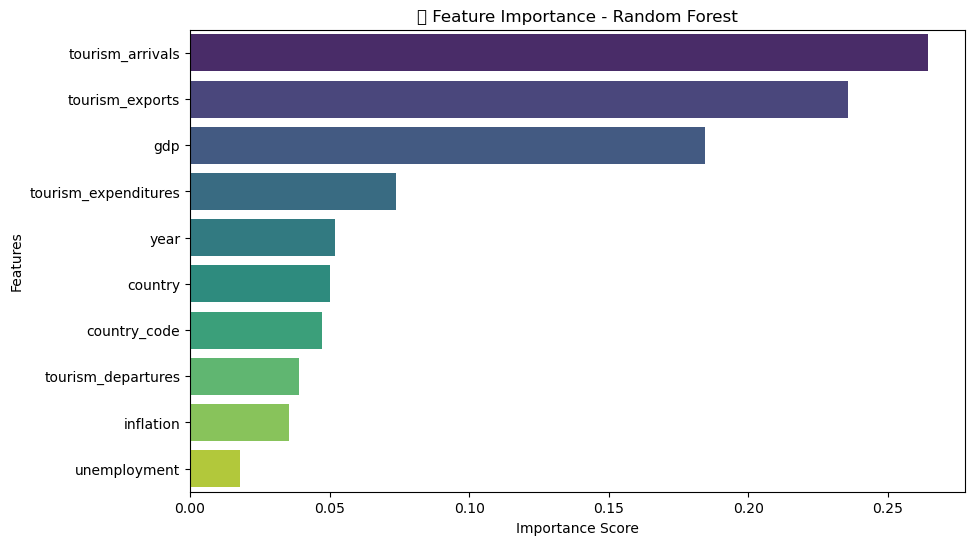

In [26]:
# Extract feature importances
rf_importance = rf_model.feature_importances_

# Create DataFrame
rf_feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_importance})
rf_feature_df = rf_feature_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=rf_feature_df, palette="viridis")
plt.title("🔹 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


#### <i> Feature Importance Of Gradient Boosting  </i>

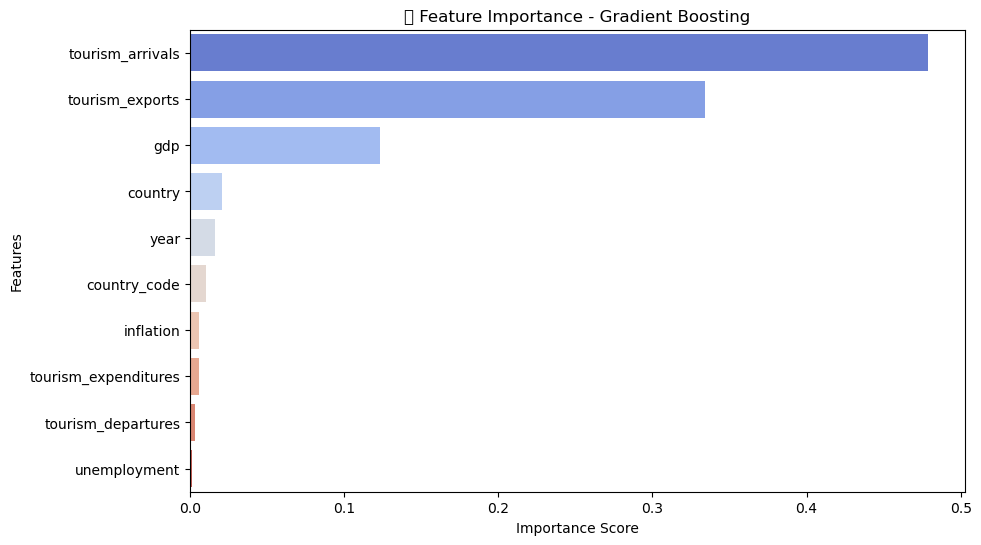

In [28]:
# Extract feature importances
gb_importance = gb_model.feature_importances_

# Create DataFrame
gb_feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb_importance})
gb_feature_df = gb_feature_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=gb_feature_df, palette="coolwarm")
plt.title("🔹 Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


#### <i> Feature Coefficients Of Logistic Regression  </i>

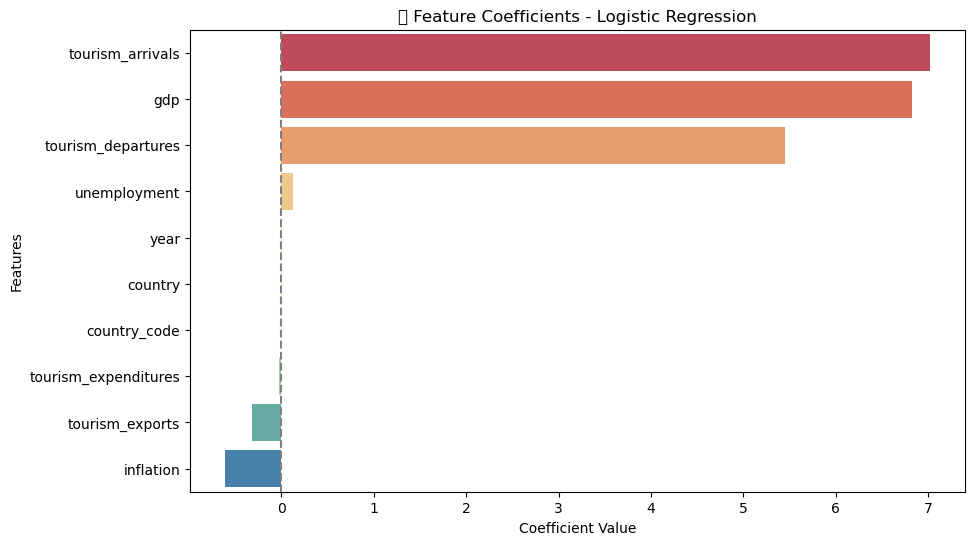

In [30]:
import numpy as np

# Extract coefficients
log_coefs = log_model.coef_[0]

# Create DataFrame
log_coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': log_coefs})
log_coef_df = log_coef_df.sort_values(by="Coefficient", ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=log_coef_df, palette="Spectral")
plt.title("🔹 Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()
